In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                             f1_score, accuracy_score, cohen_kappa_score)
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight
import warnings
warnings.filterwarnings('ignore')

In [249]:
df_raw = pd.read_csv("/content/drive/MyDrive/ConceptAndTechnologiesOfAI/Classification_Dataset/global_climate_energy_2020_2024.csv")

In [250]:
print("1. BASIC DATASET INFORMATION")
print("-" * 80)
print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")


1. BASIC DATASET INFORMATION
--------------------------------------------------------------------------------
Dataset Shape: 36,540 rows × 16 columns


In [251]:
print(f"\nColumn Names and Types:")
print(df.dtypes)


Column Names and Types:
date                         datetime64[ns]
country                              object
avg_temperature                     float64
humidity                            float64
co2_emission                        float64
energy_consumption                  float64
renewable_share                     float64
urban_population                    float64
industrial_activity_index           float64
energy_price                        float64
year                                  int32
month                                 int32
quarter                               int32
day_of_year                           int32
sustainability_level                 object
sustainability_score                  int64
dtype: object


In [252]:
df.head()

date  country  avg_temperature  humidity  co2_emission  \
0 2020-01-01  Germany            28.29     31.08        212.63   
1 2020-01-02  Germany            28.38     37.94        606.05   
2 2020-01-03  Germany            28.74     57.67        268.72   
3 2020-01-04  Germany            26.66     51.34        167.32   
4 2020-01-05  Germany            26.81     65.38        393.89   

   energy_consumption  renewable_share  urban_population  \
0            11348.75            14.42             76.39   
1             4166.64             5.63             86.26   
2             4503.80            14.20             75.92   
3             3259.13            13.84             63.15   
4             7023.72             6.93             76.02   

   industrial_activity_index  energy_price  year  month  quarter  day_of_year  \
0                      51.22         83.93  2020      1        1            1   
1                      78.27        110.40  2020      1        1            2   
2                      48.96        173.58  2020      1        1            3   
3                      97.42         89.13  2020      1        1            4   
4                      81.89         40.60  2020      1        1            5   

  sustainability_level  sustainability_score  
0               Medium                     4  
1               Medium                     4  
2                 High                     7  
3                 High                     8  
4               Medium                     5

In [253]:
print("2. DATA QUALITY ASSESSMENT")
print("-" * 80)

# Missing values
missing_data = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    print("Missing Values Detected:")
    print(missing_data)
else:
    print("✓ No missing values detected in the dataset")

2. DATA QUALITY ASSESSMENT
--------------------------------------------------------------------------------
✓ No missing values detected in the dataset


In [254]:
# Duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")


Duplicate Rows: 0 (0.00%)


In [255]:
# Data types
print(f"\nData Type Distribution:")
print(df.dtypes.value_counts())
print("\n")


Data Type Distribution:
float64           8
int32             4
object            2
datetime64[ns]    1
int64             1
Name: count, dtype: int64




In [256]:
print("3. TEMPORAL ANALYSIS")
print("-" * 80)

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['day_of_year'] = df['date'].dt.dayofyear

print(f"Date Range: {df['date'].min()} to {df['date'].max()}")
print(f"Total Days Covered: {(df['date'].max() - df['date'].min()).days:,} days")
print(f"\nRecords per Year:")
print(df['year'].value_counts().sort_index())
print("\n")

3. TEMPORAL ANALYSIS
--------------------------------------------------------------------------------
Date Range: 2020-01-01 00:00:00 to 2024-12-31 00:00:00
Total Days Covered: 1,826 days

Records per Year:
year
2020    7320
2021    7300
2022    7300
2023    7300
2024    7320
Name: count, dtype: int64




In [257]:
print("4. GEOGRAPHICAL COVERAGE")
print("-" * 80)
countries = df['country'].nunique()
print(f"Total Countries: {countries}")
print(f"\nCountries in Dataset:")
print(df['country'].unique())


4. GEOGRAPHICAL COVERAGE
--------------------------------------------------------------------------------
Total Countries: 20

Countries in Dataset:
['Germany' 'France' 'Netherlands' 'Italy' 'Spain' 'Sweden' 'Norway'
 'Poland' 'Turkey' 'United Kingdom' 'United States' 'Canada' 'Brazil'
 'India' 'China' 'Japan' 'Australia' 'South Africa' 'Mexico' 'Indonesia']


In [258]:
records_per_country = df['country'].value_counts()
print(f"\nRecords per Country:")
print(records_per_country)
print(f"\nMean records per country: {records_per_country.mean():.0f}")
print(f"Median records per country: {records_per_country.median():.0f}")
print("\n")


Records per Country:
country
Germany           1827
France            1827
Netherlands       1827
Italy             1827
Spain             1827
Sweden            1827
Norway            1827
Poland            1827
Turkey            1827
United Kingdom    1827
United States     1827
Canada            1827
Brazil            1827
India             1827
China             1827
Japan             1827
Australia         1827
South Africa      1827
Mexico            1827
Indonesia         1827
Name: count, dtype: int64

Mean records per country: 1827
Median records per country: 1827




In [259]:
print("5. DESCRIPTIVE STATISTICS - ALL NUMERICAL FEATURES")
print("-" * 80)

numerical_cols = ['avg_temperature', 'humidity', 'co2_emission', 'energy_consumption',
                  'renewable_share', 'urban_population', 'industrial_activity_index', 'energy_price']

desc_stats = df[numerical_cols].describe()
print(desc_stats.round(2))

5. DESCRIPTIVE STATISTICS - ALL NUMERICAL FEATURES
--------------------------------------------------------------------------------
       avg_temperature  humidity  co2_emission  energy_consumption  \
count         36540.00  36540.00      36540.00            36540.00   
mean             13.58     59.97        445.82             7295.90   
std              10.08     17.30        234.36             3693.93   
min              -9.60     30.00         50.15             1001.89   
25%               5.63     45.01        248.68             4184.18   
50%              13.79     59.99        422.66             6921.62   
75%              20.84     74.97        628.42            10175.11   
max              38.71     90.00        999.85            15998.05   

       renewable_share  urban_population  industrial_activity_index  \
count         36540.00          36540.00                   36540.00   
mean             15.94             74.98                      70.17   
std               5.33  

In [260]:
# Additional statistics
print("Additional Statistical Measures:")
print("-" * 80)
additional_stats = pd.DataFrame({
    'Skewness': df[numerical_cols].skew(),
    'Variance': df[numerical_cols].var(),
    'Coef_Variation': (df[numerical_cols].std() / df[numerical_cols].mean() * 100)
})
print(additional_stats.round(2))
print("\n")

Additional Statistical Measures:
--------------------------------------------------------------------------------
                           Skewness     Variance  Coef_Variation
avg_temperature                0.07       101.55           74.20
humidity                       0.00       299.40           28.85
co2_emission                   0.32     54925.03           52.57
energy_consumption             0.33  13645107.80           50.63
renewable_share                0.16        28.46           33.46
urban_population               0.00        74.74           11.53
industrial_activity_index     -0.00       300.50           24.70
energy_price                  -0.00      2418.51           42.66




In [261]:
print("6. FEATURE-SPECIFIC ANALYSIS (SDG 7, 13, 11)")
print("-" * 80)

# SDG 7: Affordable and Clean Energy
print("\nSDG 7: Affordable and Clean Energy Metrics")
print("-" * 60)
print(f"Renewable Share:")
print(f"  Mean: {df['renewable_share'].mean():.2f}%")
print(f"  Median: {df['renewable_share'].median():.2f}%")
print(f"  Range: {df['renewable_share'].min():.2f}% - {df['renewable_share'].max():.2f}%")
print(f"  Countries with >20% renewable share: {(df.groupby('country')['renewable_share'].mean() > 20).sum()}")

print(f"\nEnergy Consumption:")
print(f"  Mean: {df['energy_consumption'].mean():.2f}")
print(f"  Median: {df['energy_consumption'].median():.2f}")
print(f"  Total Energy Consumed: {df['energy_consumption'].sum():,.0f}")

print(f"\nEnergy Price:")
print(f"  Mean: {df['energy_price'].mean():.2f}")
print(f"  Volatility (Std Dev): {df['energy_price'].std():.2f}")

6. FEATURE-SPECIFIC ANALYSIS (SDG 7, 13, 11)
--------------------------------------------------------------------------------

📊 SDG 7: Affordable and Clean Energy Metrics
------------------------------------------------------------
Renewable Share:
  Mean: 15.94%
  Median: 15.71%
  Range: 5.00% - 30.87%
  Countries with >20% renewable share: 0

Energy Consumption:
  Mean: 7295.90
  Median: 6921.62
  Total Energy Consumed: 266,592,363

Energy Price:
  Mean: 115.28
  Volatility (Std Dev): 49.18


In [262]:
# SDG 13: Climate Action
print("\nSDG 13: Climate Action Metrics")
print("-" * 60)
print(f"CO2 Emissions:")
print(f"  Mean: {df['co2_emission'].mean():.2f}")
print(f"  Median: {df['co2_emission'].median():.2f}")
print(f"  Total CO2 Emitted: {df['co2_emission'].sum():,.0f}")
print(f"  High emission days (>500): {(df['co2_emission'] > 500).sum():,} ({(df['co2_emission'] > 500).sum()/len(df)*100:.2f}%)")

print(f"\nTemperature:")
print(f"  Mean: {df['avg_temperature'].mean():.2f}°C")
print(f"  Range: {df['avg_temperature'].min():.2f}°C - {df['avg_temperature'].max():.2f}°C")


🌍 SDG 13: Climate Action Metrics
------------------------------------------------------------
CO2 Emissions:
  Mean: 445.82
  Median: 422.65
  Total CO2 Emitted: 16,290,279
  High emission days (>500): 14,156 (38.74%)

Temperature:
  Mean: 13.58°C
  Range: -9.60°C - 38.71°C


In [263]:
# SDG 11: Sustainable Cities and Communities
print("\n SDG 11: Sustainable Cities and Communities Metrics")
print("-" * 60)
print(f"Urban Population:")
print(f"  Mean: {df['urban_population'].mean():.2f}%")
print(f"  Highly urbanized (>80%): {(df['urban_population'] > 80).sum():,} records")

print(f"\nIndustrial Activity Index:")
print(f"  Mean: {df['industrial_activity_index'].mean():.2f}")
print(f"  High activity (>80): {(df['industrial_activity_index'] > 80).sum():,} records")
print("\n")



🏙️ SDG 11: Sustainable Cities and Communities Metrics
------------------------------------------------------------
Urban Population:
  Mean: 74.98%
  Highly urbanized (>80%): 12,111 records

Industrial Activity Index:
  Mean: 70.17
  High activity (>80): 12,320 records




In [264]:
print("7. CORRELATION ANALYSIS")
print("-" * 80)

correlation_matrix = df[numerical_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Strong correlations (|r| > 0.5)
print("\nStrong Correlations (|r| > 0.5):")
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            strong_corr.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if strong_corr:
    strong_corr_df = pd.DataFrame(strong_corr).sort_values('Correlation', key=abs, ascending=False)
    print(strong_corr_df.to_string(index=False))
else:
    print("No strong correlations detected")
print("\n")


7. CORRELATION ANALYSIS
--------------------------------------------------------------------------------
Correlation Matrix:
                           avg_temperature  humidity  co2_emission  \
avg_temperature                      1.000     0.005         0.005   
humidity                             0.005     1.000         0.001   
co2_emission                         0.005     0.001         1.000   
energy_consumption                  -0.007     0.003         0.172   
renewable_share                     -0.003     0.008        -0.002   
urban_population                     0.002     0.001        -0.003   
industrial_activity_index           -0.000    -0.008         0.002   
energy_price                         0.000    -0.000         0.004   

                           energy_consumption  renewable_share  \
avg_temperature                        -0.007           -0.003   
humidity                                0.003            0.008   
co2_emission                            0.172 

In [265]:
print("8. COUNTRY-LEVEL AGGREGATED METRICS")
print("-" * 80)

country_metrics = df.groupby('country').agg({
    'co2_emission': 'mean',
    'energy_consumption': 'mean',
    'renewable_share': 'mean',
    'urban_population': 'mean',
    'industrial_activity_index': 'mean',
    'energy_price': 'mean',
    'avg_temperature': 'mean'
}).round(2)

country_metrics.columns = ['Avg_CO2', 'Avg_Energy_Consumption', 'Avg_Renewable_Share',
                           'Avg_Urban_Pop', 'Avg_Industrial_Activity', 'Avg_Energy_Price',
                           'Avg_Temperature']

country_metrics


8. COUNTRY-LEVEL AGGREGATED METRICS
--------------------------------------------------------------------------------


Avg_CO2  Avg_Energy_Consumption  Avg_Renewable_Share  \
country                                                                
Australia        454.39                 7239.90                15.97   
Brazil           440.88                 7308.89                15.96   
Canada           445.32                 7220.40                16.03   
China            448.99                 7307.75                15.87   
France           448.68                 7301.72                15.97   
Germany          449.45                 7435.52                15.96   
India            445.74                 7352.73                15.98   
Indonesia        437.79                 7401.16                15.91   
Italy            442.61                 7204.33                15.93   
Japan            449.51                 7260.91                15.92   
Mexico           449.77                 7405.19                16.08   
Netherlands      446.45                 7286.94                15.92   
Norway           447.82                 7257.16                15.94   
Poland           446.10                 7277.24                15.85   
South Africa     449.36                 7276.36                15.93   
Spain            446.87                 7138.01                15.89   
Sweden           443.88                 7238.51                15.89   
Turkey           432.33                 7341.62                15.91   
United Kingdom   442.86                 7278.72                16.05   
United States    447.63                 7385.03                15.92   

                Avg_Urban_Pop  Avg_Industrial_Activity  Avg_Energy_Price  \
country                                                                    
Australia               75.14                    70.48            113.75   
Brazil                  75.32                    69.47            115.90   
Canada                  75.34                    70.45            115.08   
China                   75.08                    70.07            115.99   
France                  75.13                    70.37            114.94   
Germany                 74.93                    70.01            115.90   
India                   75.08                    70.40            116.90   
Indonesia               75.10                    70.60            114.00   
Italy                   75.20                    70.45            114.50   
Japan                   75.26                    69.91            114.65   
Mexico                  74.85                    70.39            113.81   
Netherlands             75.01                    70.22            116.00   
Norway                  74.73                    70.33            116.68   
Poland                  74.80                    69.46            115.69   
South Africa            74.33                    70.47            114.47   
Spain                   74.92                    69.86            116.25   
Sweden                  74.90                    69.92            114.32   
Turkey                  74.61                    70.02            115.32   
United Kingdom          74.95                    70.48            115.67   
United States           74.97                    70.09            115.79   

                Avg_Temperature  
country                          
Australia                 23.38  
Brazil                    10.50  
Canada                    16.42  
China                     15.80  
France                    10.39  
Germany                   22.44  
India                      5.23  
Indonesia                 10.86  
Italy                     20.50  
Japan                     23.67  
Mexico                    16.57  
Netherlands               18.98  
Norway                     8.96  
Poland                    13.16  
South Africa               5.58  
Spain                     15.84  
Sweden                     9.08  
Turkey                     8.36  
United Kingdom             8.83  
United States              7.09

In [266]:
print("9. SUSTAINABILITY CLASSIFICATION - TARGET VARIABLE CREATION")
print("-" * 80)

# Create sustainability score based on proposal criteria
# Higher renewable share = better
# Lower CO2 emissions = better
# Lower energy consumption per capita = better (normalized)

def create_sustainability_level(row):
    """
    Create sustainability levels: Low, Medium, High
    Based on renewable share, CO2 emissions, and energy consumption
    """
    score = 0

    # Renewable share scoring (0-3 points)
    if row['renewable_share'] >= 15:
        score += 3
    elif row['renewable_share'] >= 10:
        score += 2
    elif row['renewable_share'] >= 5:
        score += 1

    # CO2 emissions scoring (0-3 points) - lower is better
    if row['co2_emission'] < 200:
        score += 3
    elif row['co2_emission'] < 400:
        score += 2
    elif row['co2_emission'] < 600:
        score += 1

    # Energy consumption scoring (0-3 points) - moderate consumption preferred
    if row['energy_consumption'] < 5000:
        score += 3
    elif row['energy_consumption'] < 8000:
        score += 2
    elif row['energy_consumption'] < 10000:
        score += 1

    # Classify based on total score (0-9)
    if score >= 7:
        return 'High'
    elif score >= 4:
        return 'Medium'
    else:
        return 'Low'

df['sustainability_level'] = df.apply(create_sustainability_level, axis=1)

print("Sustainability Level Distribution:")
print(df['sustainability_level'].value_counts())
print(f"\nPercentage Distribution:")
print((df['sustainability_level'].value_counts(normalize=True) * 100).round(2))

9. SUSTAINABILITY CLASSIFICATION - TARGET VARIABLE CREATION
--------------------------------------------------------------------------------
Sustainability Level Distribution:
sustainability_level
Medium    19070
High      11175
Low        6295
Name: count, dtype: int64

Percentage Distribution:
sustainability_level
Medium    52.19
High      30.58
Low       17.23
Name: proportion, dtype: float64


In [267]:
print("\n\nSustainability Metrics by Level:")
sustainability_profile = df.groupby('sustainability_level')[numerical_cols].mean().round(2)
sustainability_profile



Sustainability Metrics by Level:


avg_temperature  humidity  co2_emission  \
sustainability_level                                            
High                            13.56     59.90        259.30   
Low                             13.44     59.85        681.60   
Medium                          13.64     60.05        477.29   

                      energy_consumption  renewable_share  urban_population  \
sustainability_level                                                          
High                             4400.50            17.87             74.93   
Low                             11530.55            13.39             75.07   
Medium                           7594.75            15.66             74.98   

                      industrial_activity_index  energy_price  
sustainability_level                                           
High                                      70.27        115.42  
Low                                       69.99        115.53  
Medium                                    70.18        115.11

In [268]:
print("\n\nCountries by Dominant Sustainability Level:")
country_sustainability = df.groupby(['country', 'sustainability_level']).size().unstack(fill_value=0)
dominant_level = country_sustainability.idxmax(axis=1)
dominant_level



Countries by Dominant Sustainability Level:


country
Australia         Medium
Brazil            Medium
Canada            Medium
China             Medium
France            Medium
Germany           Medium
India             Medium
Indonesia         Medium
Italy             Medium
Japan             Medium
Mexico            Medium
Netherlands       Medium
Norway            Medium
Poland            Medium
South Africa      Medium
Spain             Medium
Sweden            Medium
Turkey            Medium
United Kingdom    Medium
United States     Medium
dtype: object

In [269]:
print("10. OUTLIER DETECTION (IQR Method)")
print("-" * 80)

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_pct = (outliers / len(df) * 100)

    print(f"{col}:")
    print(f"  Outliers: {outliers:,} ({outlier_pct:.2f}%)")
    print(f"  Range: [{lower_bound:.2f}, {upper_bound:.2f}]")
print("\n")

10. OUTLIER DETECTION (IQR Method)
--------------------------------------------------------------------------------
avg_temperature:
  Outliers: 0 (0.00%)
  Range: [-17.19, 43.66]
humidity:
  Outliers: 0 (0.00%)
  Range: [0.07, 119.91]
co2_emission:
  Outliers: 0 (0.00%)
  Range: [-320.95, 1198.04]
energy_consumption:
  Outliers: 0 (0.00%)
  Range: [-4802.22, 19161.51]
renewable_share:
  Outliers: 0 (0.00%)
  Range: [0.29, 31.57]
urban_population:
  Outliers: 0 (0.00%)
  Range: [44.92, 105.05]
industrial_activity_index:
  Outliers: 0 (0.00%)
  Range: [10.36, 130.20]
energy_price:
  Outliers: 0 (0.00%)
  Range: [-56.36, 287.05]




In [270]:
print("11. TEMPORAL TRENDS (YEARLY AVERAGES)")
print("-" * 80)

yearly_trends = df.groupby('year')[numerical_cols].mean().round(2)
print(yearly_trends)

11. TEMPORAL TRENDS (YEARLY AVERAGES)
--------------------------------------------------------------------------------
      avg_temperature  humidity  co2_emission  energy_consumption  \
year                                                                
2020            13.60     59.54        451.06             7322.55   
2021            13.58     59.90        439.41             7279.66   
2022            13.58     59.99        446.31             7278.26   
2023            13.55     60.21        445.25             7338.22   
2024            13.59     60.21        447.06             7260.85   

      renewable_share  urban_population  industrial_activity_index  \
year                                                                 
2020             9.97             75.07                      70.03   
2021            12.88             74.90                      70.17   
2022            15.92             75.05                      70.09   
2023            18.98             74.98        

In [271]:
print("Year-over-Year Changes (%):")
yoy_change = yearly_trends.pct_change() * 100
yoy_change.round(2)

Year-over-Year Changes (%):


avg_temperature  humidity  co2_emission  energy_consumption  \
year                                                                
2020              NaN       NaN           NaN                 NaN   
2021            -0.15      0.60         -2.58               -0.59   
2022             0.00      0.15          1.57               -0.02   
2023            -0.22      0.37         -0.24                0.82   
2024             0.30      0.00          0.41               -1.05   

      renewable_share  urban_population  industrial_activity_index  \
year                                                                 
2020              NaN               NaN                        NaN   
2021            29.19             -0.23                       0.20   
2022            23.60              0.20                      -0.11   
2023            19.22             -0.09                       0.44   
2024            15.70             -0.09                      -0.33   

      energy_price  
year                
2020           NaN  
2021         -1.33  
2022          0.88  
2023          0.59  
2024         -0.68

In [272]:
print("12. PRELIMINARY FEATURE RELEVANCE ASSESSMENT")
print("-" * 80)
#saving dataset on metrics here mirage

# Variance
print("Feature Variance (Higher = More Information):")
variance_df = pd.DataFrame({
    'Feature': numerical_cols,
    'Variance': [df[col].var() for col in numerical_cols]
}).sort_values('Variance', ascending=False)
print(variance_df.to_string(index=False))

print("\n")


12. PRELIMINARY FEATURE RELEVANCE ASSESSMENT
--------------------------------------------------------------------------------
Feature Variance (Higher = More Information):
                  Feature     Variance
       energy_consumption 1.364511e+07
             co2_emission 5.492503e+04
             energy_price 2.418511e+03
industrial_activity_index 3.004959e+02
                 humidity 2.993974e+02
          avg_temperature 1.015509e+02
         urban_population 7.474294e+01
          renewable_share 2.846013e+01




In [273]:
# Generate summary statistics report
summary_stats = {
    'total_records': len(df),
    'total_countries': df['country'].nunique(),
    'date_range': f"{df['date'].min()} to {df['date'].max()}",
    'avg_renewable_share': df['renewable_share'].mean(),
    'avg_co2_emission': df['co2_emission'].mean(),
    'high_sustainability_pct': (df['sustainability_level'] == 'High').sum() / len(df) * 100,
    'missing_values': df.isnull().sum().sum()
}

print("\n DATASET SUMMARY:")
for key, value in summary_stats.items():
    print(f"  {key}: {value}")

print("\nEDA analysis complete")


 DATASET SUMMARY:
  total_records: 36540
  total_countries: 20
  date_range: 2020-01-01 00:00:00 to 2024-12-31 00:00:00
  avg_renewable_share: 15.94407963875205
  avg_co2_emission: 445.82045183360697
  high_sustainability_pct: 30.582922824302134
  missing_values: 0

EDA analysis complete


Creating Chart 1: Sustainability Level Distribution


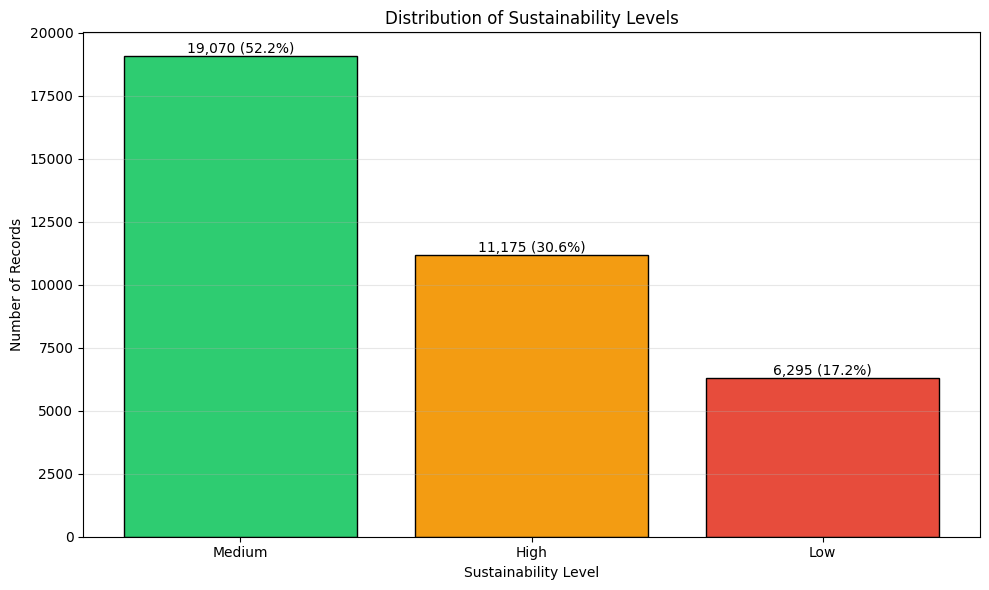

In [274]:
print("Creating Chart 1: Sustainability Level Distribution")

plt.figure(figsize=(10, 6))

counts = df['sustainability_level'].value_counts()
bars = plt.bar(counts.index, counts.values,
               color=['#2ecc71', '#f39c12', '#e74c3c'],
               edgecolor='black')

for bar in bars:
    value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             value,
             f'{int(value):,} ({value/len(df)*100:.1f}%)',
             ha='center', va='bottom')

plt.xlabel('Sustainability Level')
plt.ylabel('Number of Records')
plt.title('Distribution of Sustainability Levels')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Creating Chart 2: Sustainability Distribution by Country


<Figure size 1200x800 with 0 Axes>

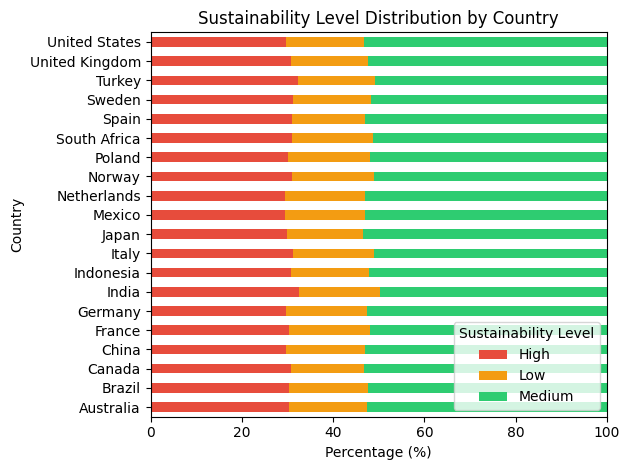

In [275]:
print("Creating Chart 2: Sustainability Distribution by Country")

plt.figure(figsize=(12, 8))

country_data = (
    df.groupby(['country', 'sustainability_level'])
      .size()
      .unstack(fill_value=0)
)

country_pct = country_data.div(country_data.sum(axis=1), axis=0) * 100

country_pct.plot(
    kind='barh',
    stacked=True,
    color=['#e74c3c', '#f39c12', '#2ecc71']
)

plt.xlabel('Percentage (%)')
plt.ylabel('Country')
plt.title('Sustainability Level Distribution by Country')
plt.legend(title='Sustainability Level', loc='lower right')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()


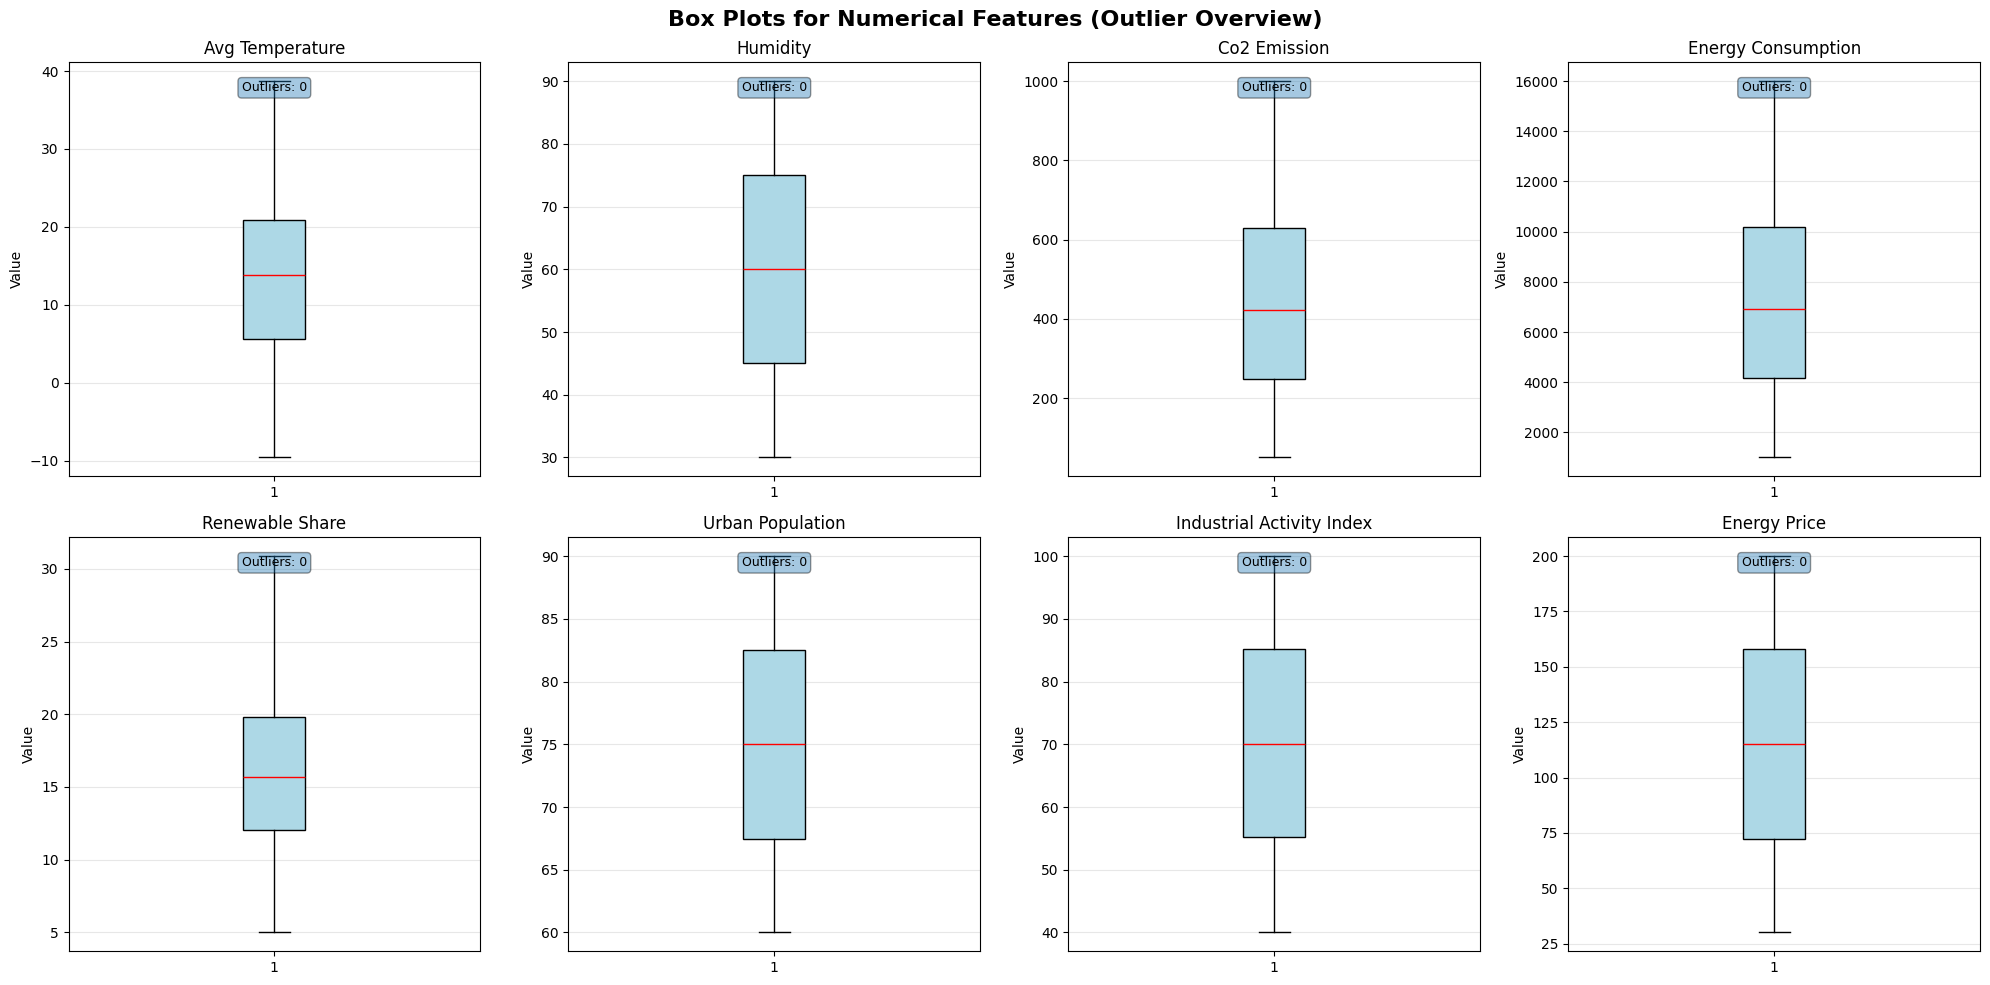

In [276]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

features = [
    'avg_temperature', 'humidity', 'co2_emission', 'energy_consumption',
    'renewable_share', 'urban_population',
    'industrial_activity_index', 'energy_price'
]

for ax, feature in zip(axes, features):
    data = df[feature]

    ax.boxplot(
        data,
        patch_artist=True,
        boxprops=dict(facecolor='lightblue'),
        medianprops=dict(color='red'),
        flierprops=dict(marker='o', markersize=4, alpha=0.6)
    )

    ax.set_title(feature.replace('_', ' ').title(), fontsize=12)
    ax.set_ylabel('Value')
    ax.grid(axis='y', alpha=0.3)

    # Outlier info
    q1, q3 = data.quantile([0.25, 0.75])
    iqr = q3 - q1
    outliers = ((data < q1 - 1.5 * iqr) | (data > q3 + 1.5 * iqr)).sum()

    ax.text(
        0.5, 0.93,
        f'Outliers: {outliers}',
        transform=ax.transAxes,
        ha='center',
        fontsize=9,
        bbox=dict(boxstyle='round', alpha=0.4)
    )

plt.suptitle(
    'Box Plots for Numerical Features (Outlier Overview)',
    fontsize=16,
    fontweight='bold'
)

plt.tight_layout()
plt.show()


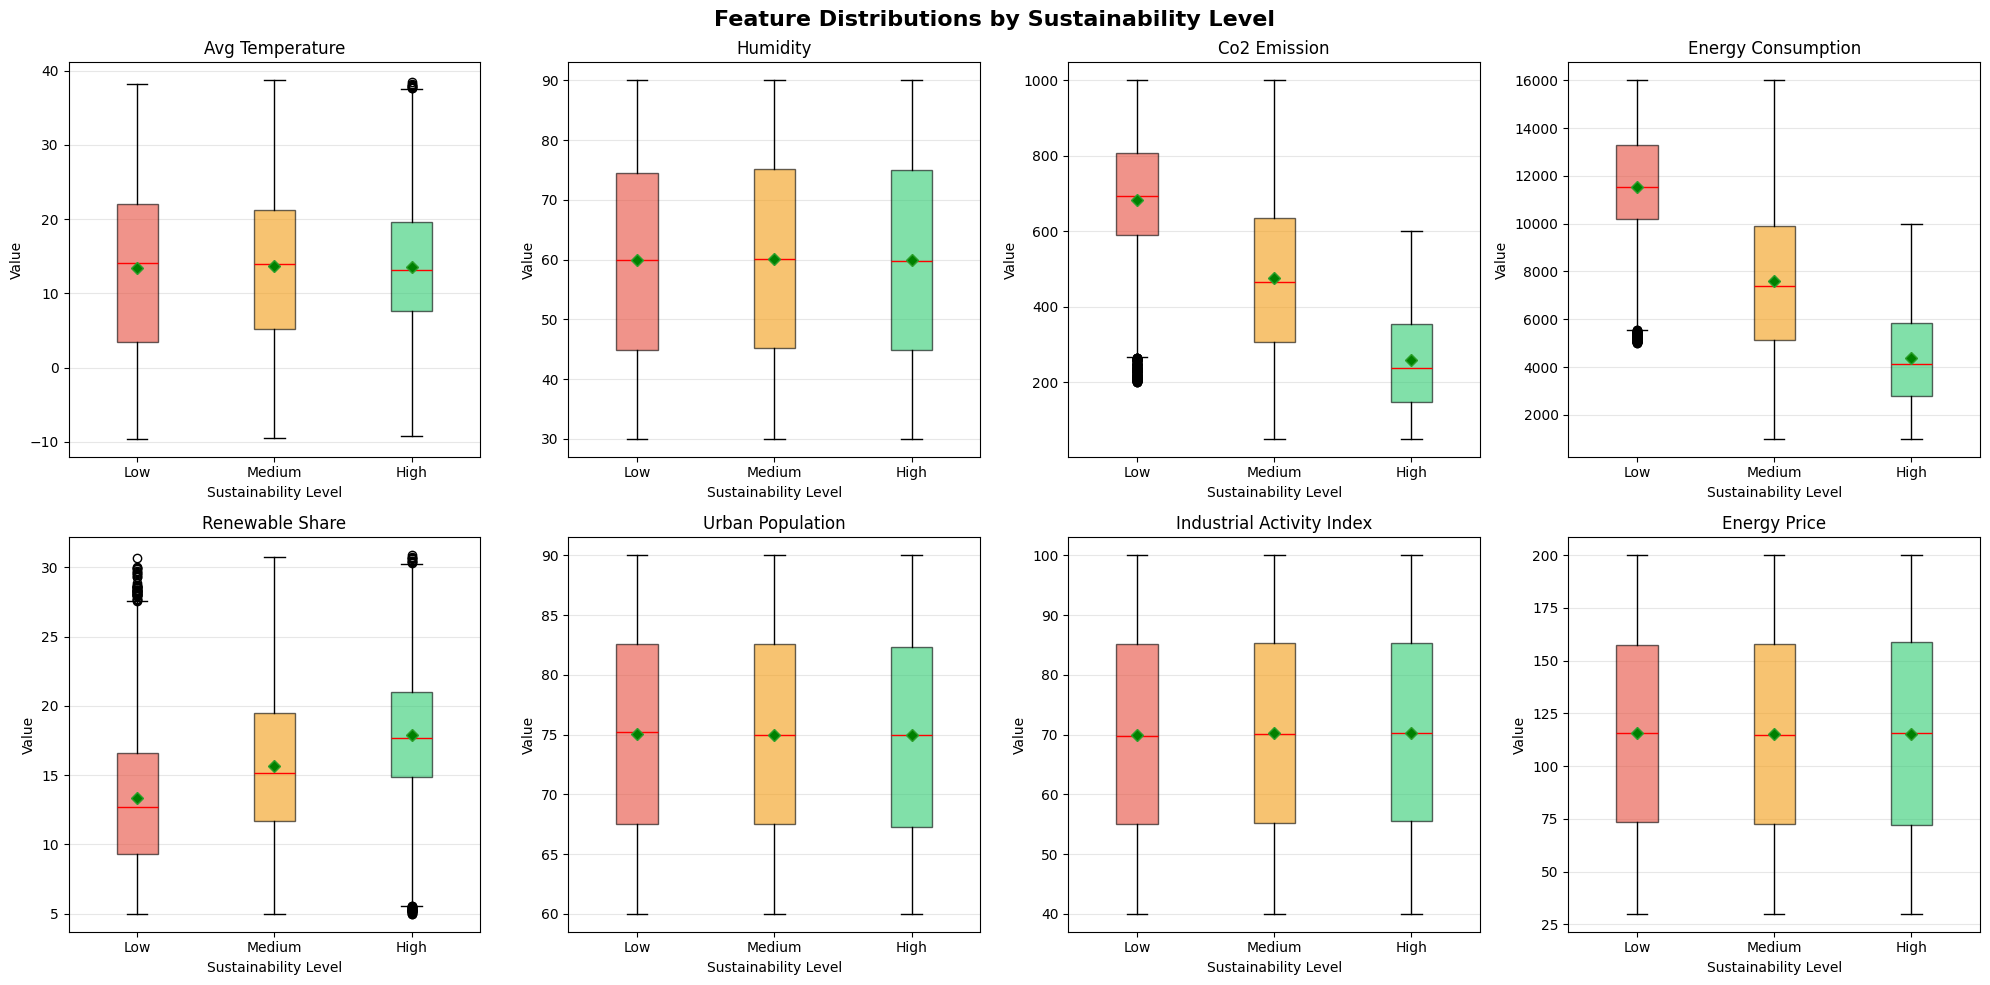

In [277]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

levels = ['Low', 'Medium', 'High']
colors = ['#e74c3c', '#f39c12', '#2ecc71']  # red → orange → green

for ax, feature in zip(axes, numerical_features):
    grouped_data = [
        df[df['sustainability_level'] == level][feature]
        for level in levels
    ]

    bp = ax.boxplot(
        grouped_data,
        labels=levels,
        patch_artist=True,
        showmeans=True,
        medianprops=dict(color='red'),
        meanprops=dict(marker='D', markerfacecolor='green', markersize=6)
    )

    # Colour each sustainability level
    for box, color in zip(bp['boxes'], colors):
        box.set_facecolor(color)
        box.set_alpha(0.6)

    ax.set_title(feature.replace('_', ' ').title(), fontsize=12)
    ax.set_xlabel('Sustainability Level')
    ax.set_ylabel('Value')
    ax.grid(axis='y', alpha=0.3)

plt.suptitle(
    'Feature Distributions by Sustainability Level',
    fontsize=16,
    fontweight='bold'
)

plt.tight_layout()
plt.show()


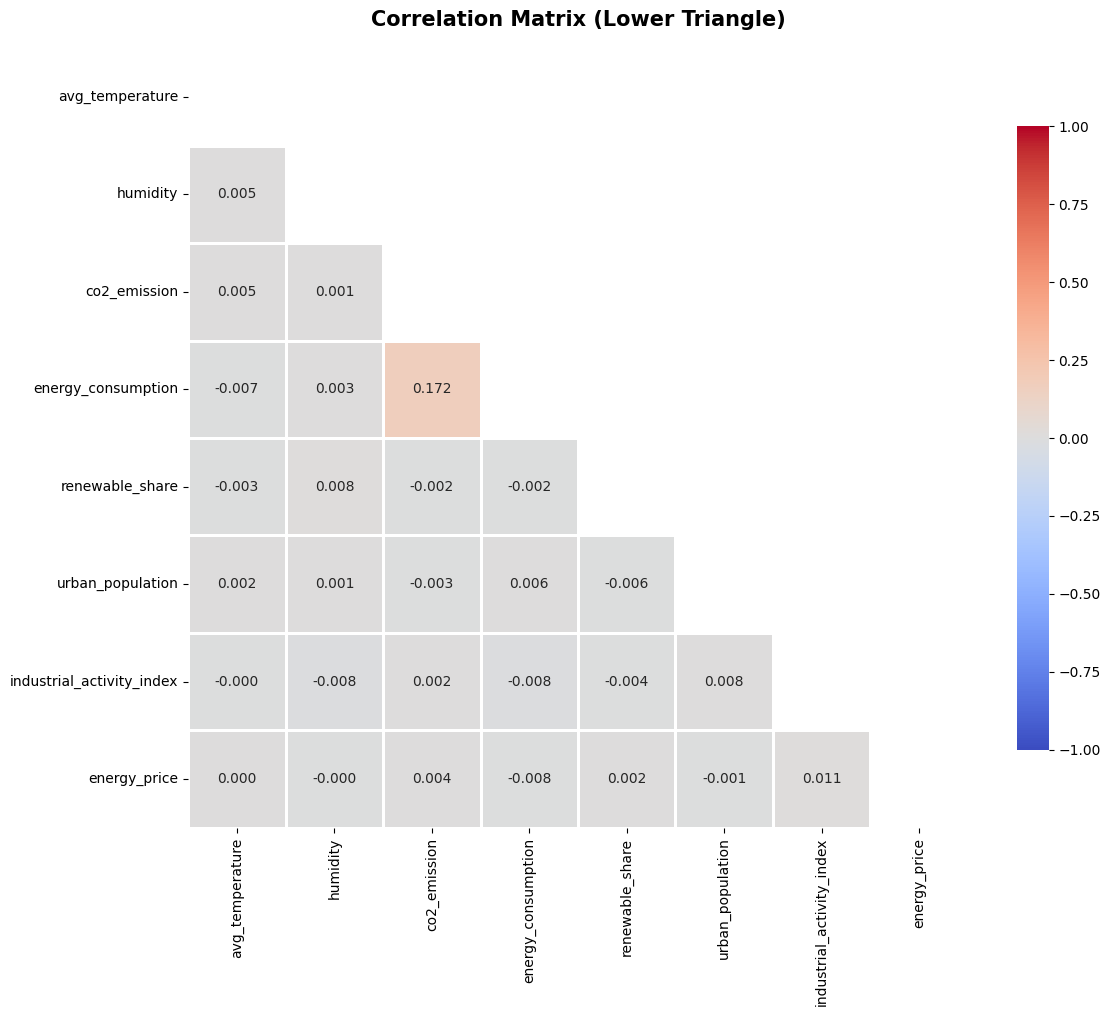

In [278]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

corr = df[numerical_features].corr()

# Mask the upper triangle for readability
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))

sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt='.3f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.8,
    cbar_kws={'shrink': 0.8},
    vmin=-1,
    vmax=1
)

plt.title(
    'Correlation Matrix (Lower Triangle)',
    fontsize=15,
    fontweight='bold',
    pad=16
)

plt.tight_layout()
plt.show()


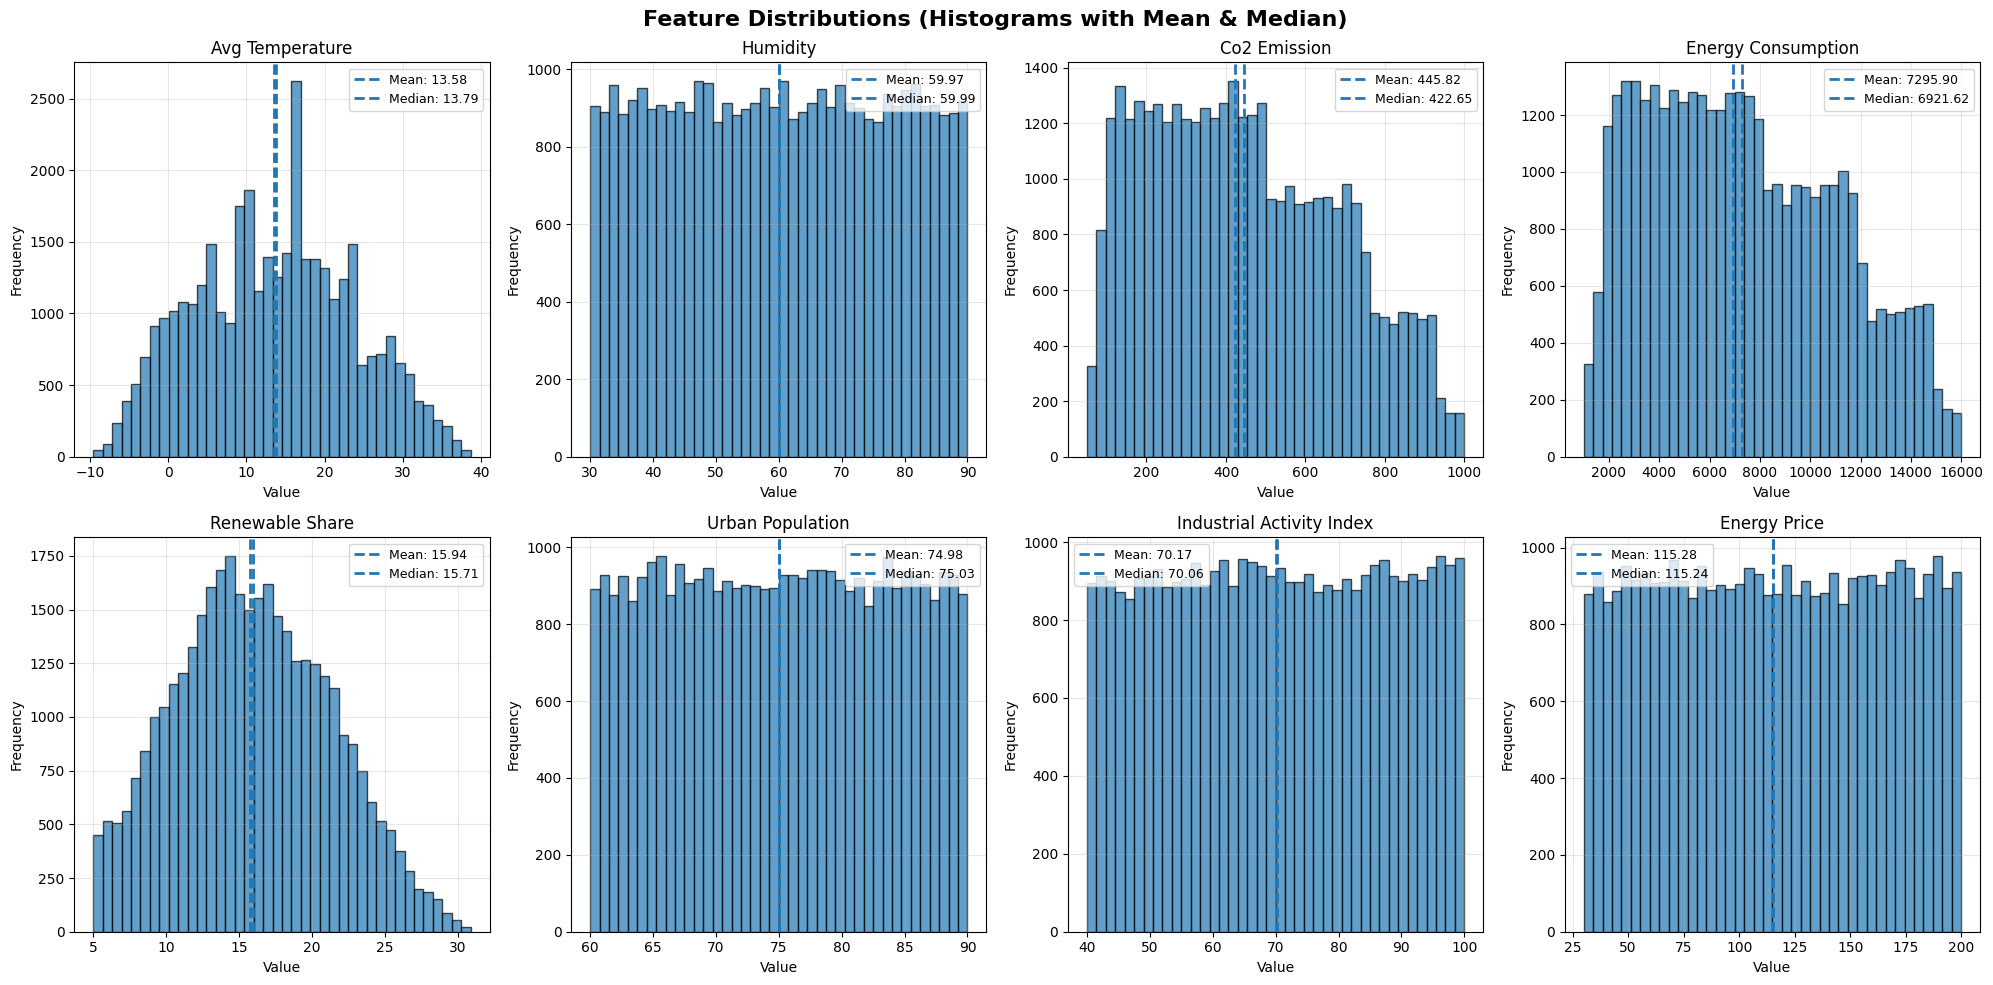

In [279]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for ax, feature in zip(axes, numerical_features):
    data = df[feature]

    ax.hist(
        data,
        bins=40,
        alpha=0.7,
        edgecolor='black'
    )

    mean_val = data.mean()
    median_val = data.median()

    ax.axvline(mean_val, linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')

    ax.set_title(feature.replace('_', ' ').title(), fontsize=12)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend(fontsize=9)
    ax.grid(alpha=0.3)

plt.suptitle(
    'Feature Distributions (Histograms with Mean & Median)',
    fontsize=16,
    fontweight='bold'
)

plt.tight_layout()
plt.show()


Creating Chart 10: Density Plots (KDE)...


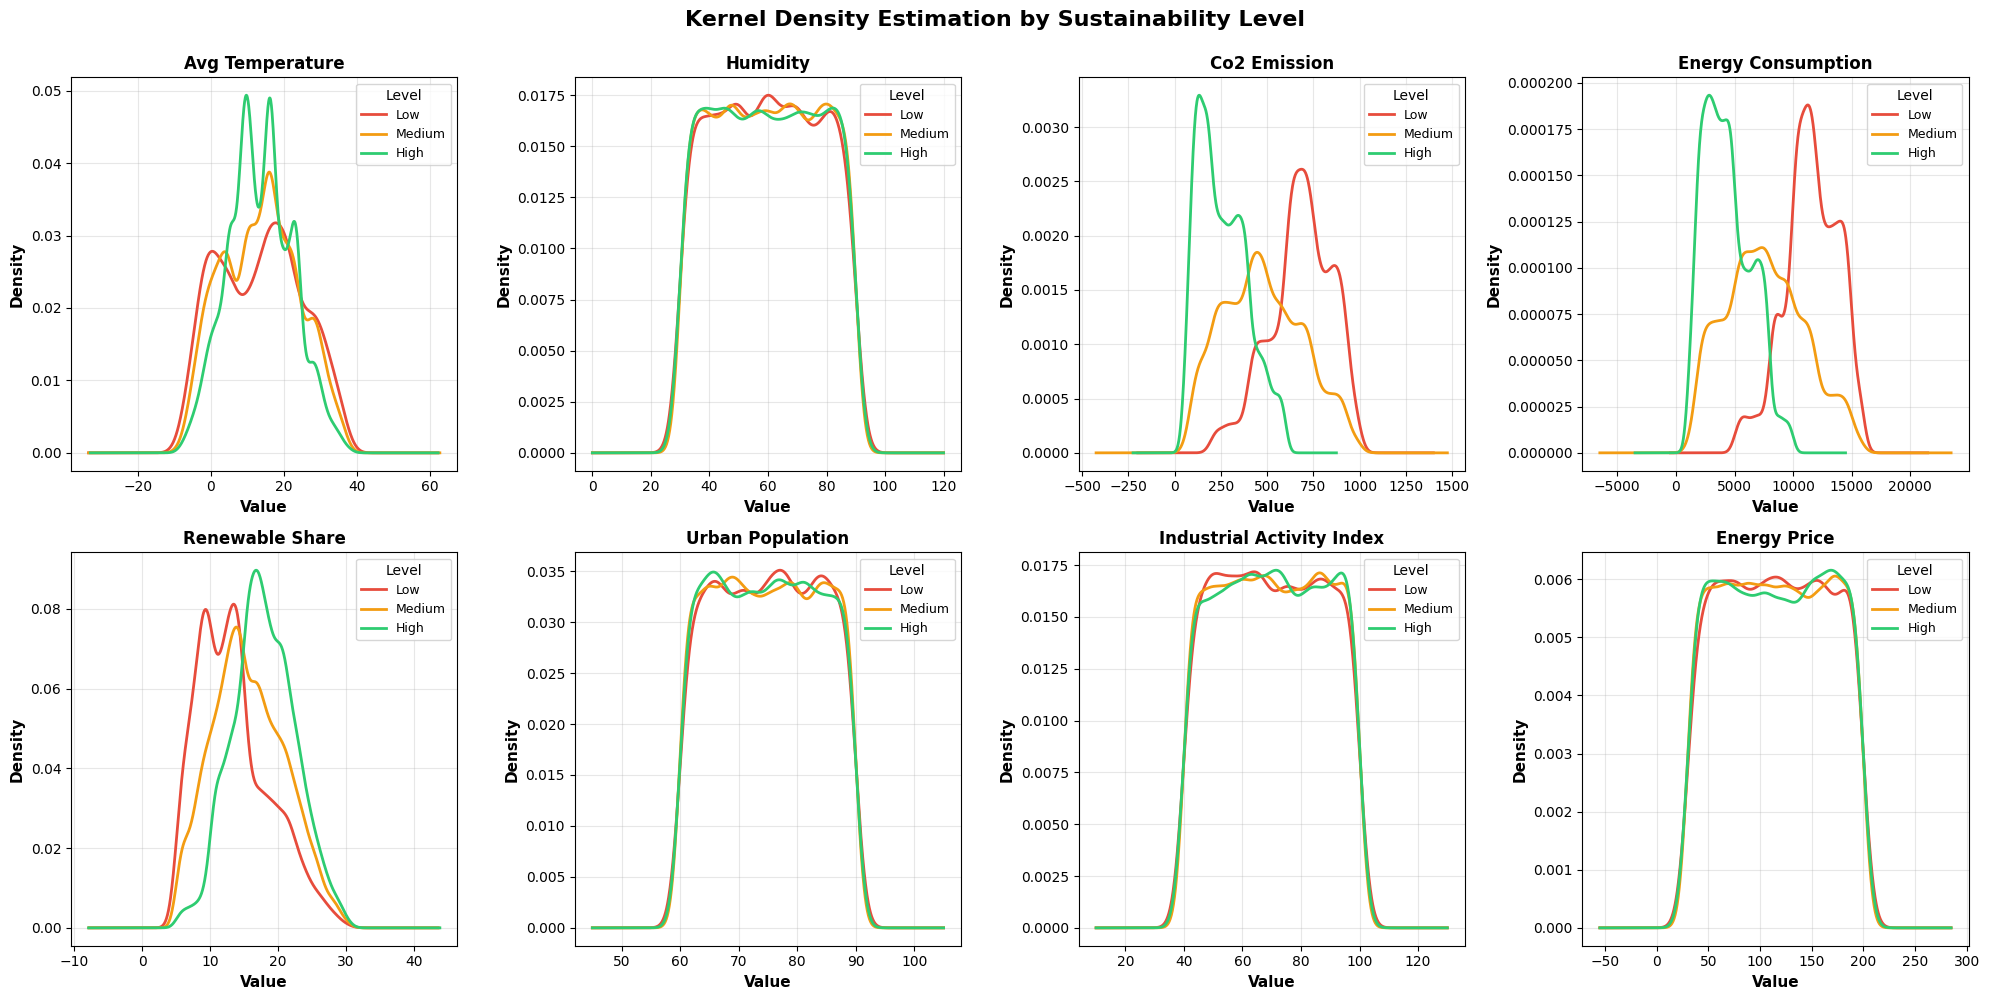

In [280]:
print("Creating Chart 10: Density Plots (KDE)...")

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    for level, color in zip(['Low', 'Medium', 'High'],
                           ['#e74c3c', '#f39c12', '#2ecc71']):
        data = df[df['sustainability_level'] == level][feature]
        data.plot(kind='kde', ax=axes[idx], label=level, color=color, linewidth=2)

    axes[idx].set_xlabel('Value', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Density', fontsize=11, fontweight='bold')
    axes[idx].set_title(feature.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    axes[idx].legend(title='Level', fontsize=9)
    axes[idx].grid(alpha=0.3)

plt.suptitle('Kernel Density Estimation by Sustainability Level',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()

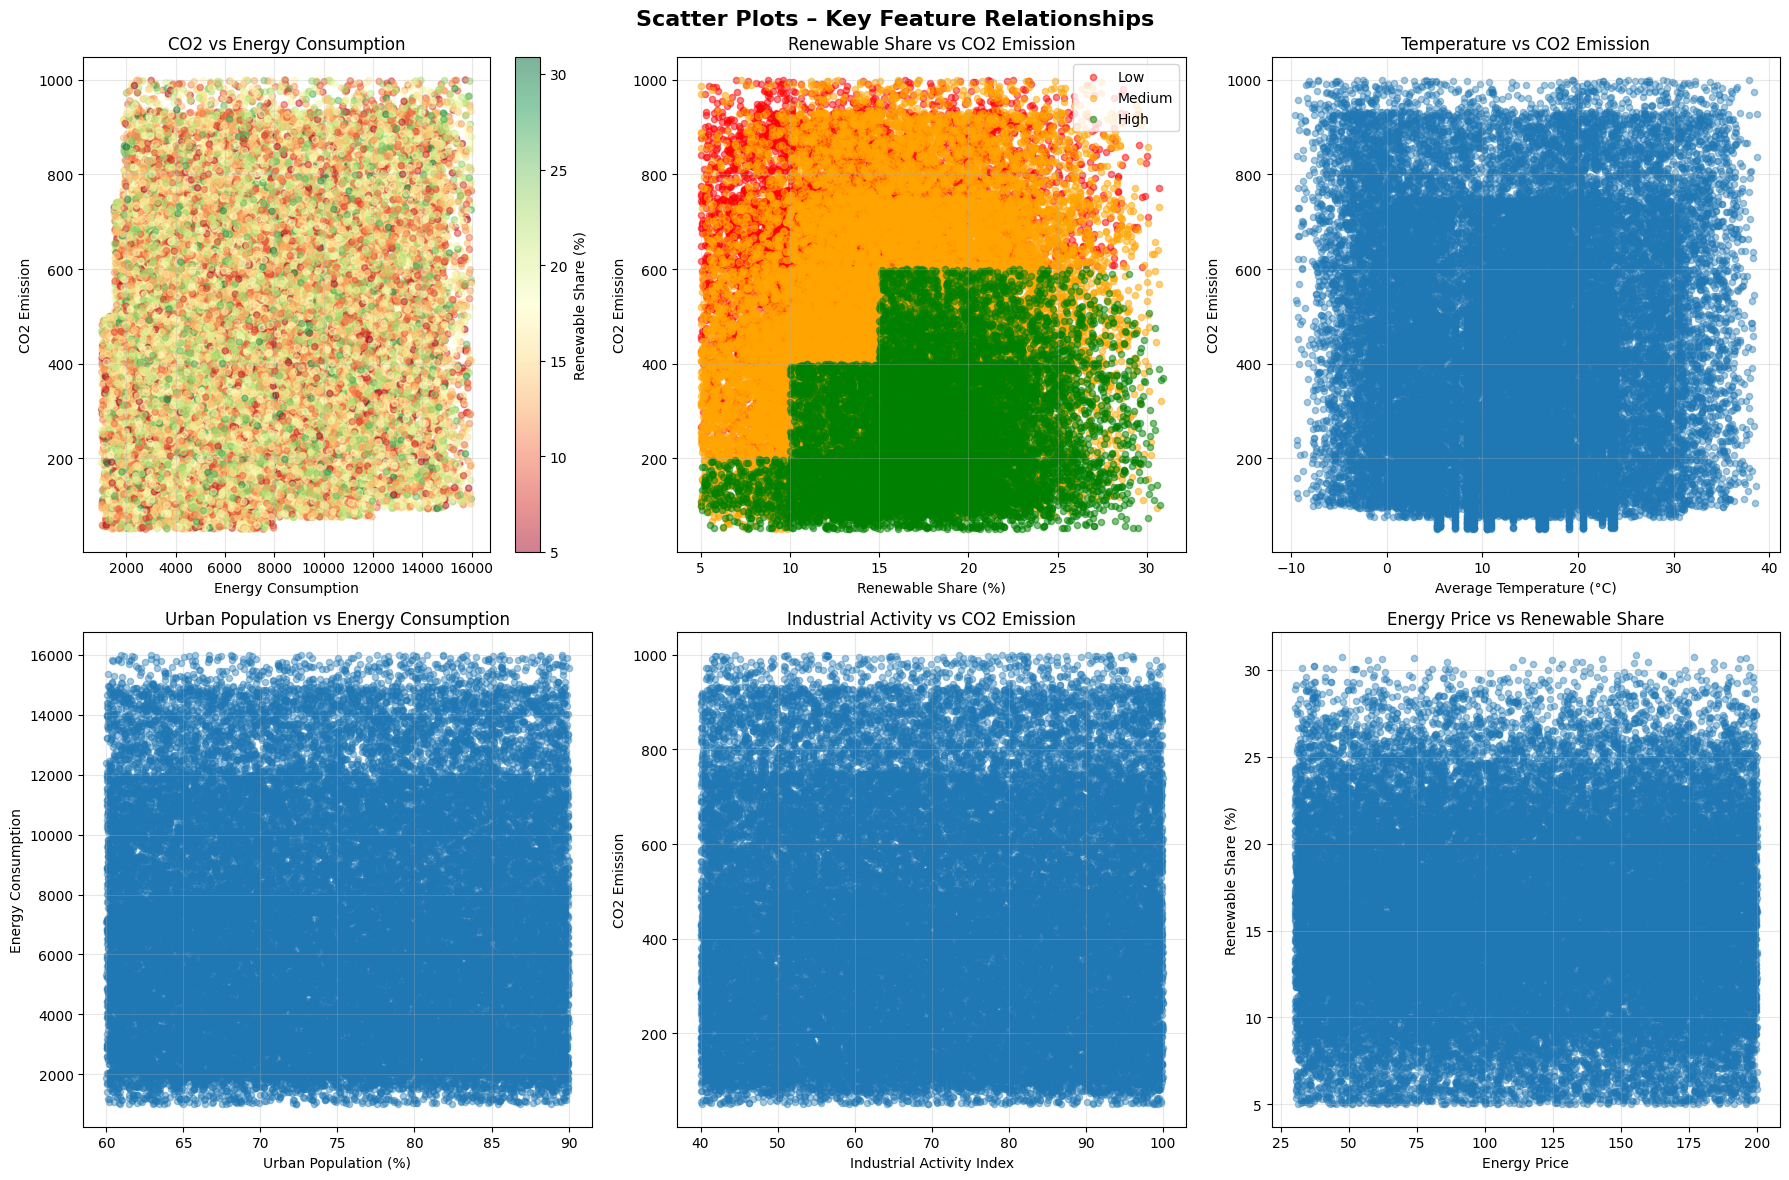

In [281]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. CO2 vs Energy Consumption (colored by renewable share)
sc = axes[0, 0].scatter(
    df['energy_consumption'],
    df['co2_emission'],
    c=df['renewable_share'],
    cmap='RdYlGn',
    alpha=0.5,
    s=20
)
axes[0, 0].set_title('CO2 vs Energy Consumption')
axes[0, 0].set_xlabel('Energy Consumption')
axes[0, 0].set_ylabel('CO2 Emission')
axes[0, 0].grid(alpha=0.3)
plt.colorbar(sc, ax=axes[0, 0], label='Renewable Share (%)')

# 2. Renewable Share vs CO2 (by sustainability level)
levels = ['Low', 'Medium', 'High']
colors = ['red', 'orange', 'green']

for level, color in zip(levels, colors):
    subset = df[df['sustainability_level'] == level]
    axes[0, 1].scatter(
        subset['renewable_share'],
        subset['co2_emission'],
        label=level,
        color=color,
        alpha=0.5,
        s=20
    )

axes[0, 1].set_title('Renewable Share vs CO2 Emission')
axes[0, 1].set_xlabel('Renewable Share (%)')
axes[0, 1].set_ylabel('CO2 Emission')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Temperature vs CO2
axes[0, 2].scatter(
    df['avg_temperature'],
    df['co2_emission'],
    alpha=0.4,
    s=20
)
axes[0, 2].set_title('Temperature vs CO2 Emission')
axes[0, 2].set_xlabel('Average Temperature (°C)')
axes[0, 2].set_ylabel('CO2 Emission')
axes[0, 2].grid(alpha=0.3)

# 4. Urban Population vs Energy Consumption
axes[1, 0].scatter(
    df['urban_population'],
    df['energy_consumption'],
    alpha=0.4,
    s=20
)
axes[1, 0].set_title('Urban Population vs Energy Consumption')
axes[1, 0].set_xlabel('Urban Population (%)')
axes[1, 0].set_ylabel('Energy Consumption')
axes[1, 0].grid(alpha=0.3)

# 5. Industrial Activity vs CO2
axes[1, 1].scatter(
    df['industrial_activity_index'],
    df['co2_emission'],
    alpha=0.4,
    s=20
)
axes[1, 1].set_title('Industrial Activity vs CO2 Emission')
axes[1, 1].set_xlabel('Industrial Activity Index')
axes[1, 1].set_ylabel('CO2 Emission')
axes[1, 1].grid(alpha=0.3)

# 6. Energy Price vs Renewable Share
axes[1, 2].scatter(
    df['energy_price'],
    df['renewable_share'],
    alpha=0.4,
    s=20
)
axes[1, 2].set_title('Energy Price vs Renewable Share')
axes[1, 2].set_xlabel('Energy Price')
axes[1, 2].set_ylabel('Renewable Share (%)')
axes[1, 2].grid(alpha=0.3)

plt.suptitle(
    'Scatter Plots – Key Feature Relationships',
    fontsize=16,
    fontweight='bold'
)

plt.tight_layout()
plt.show()


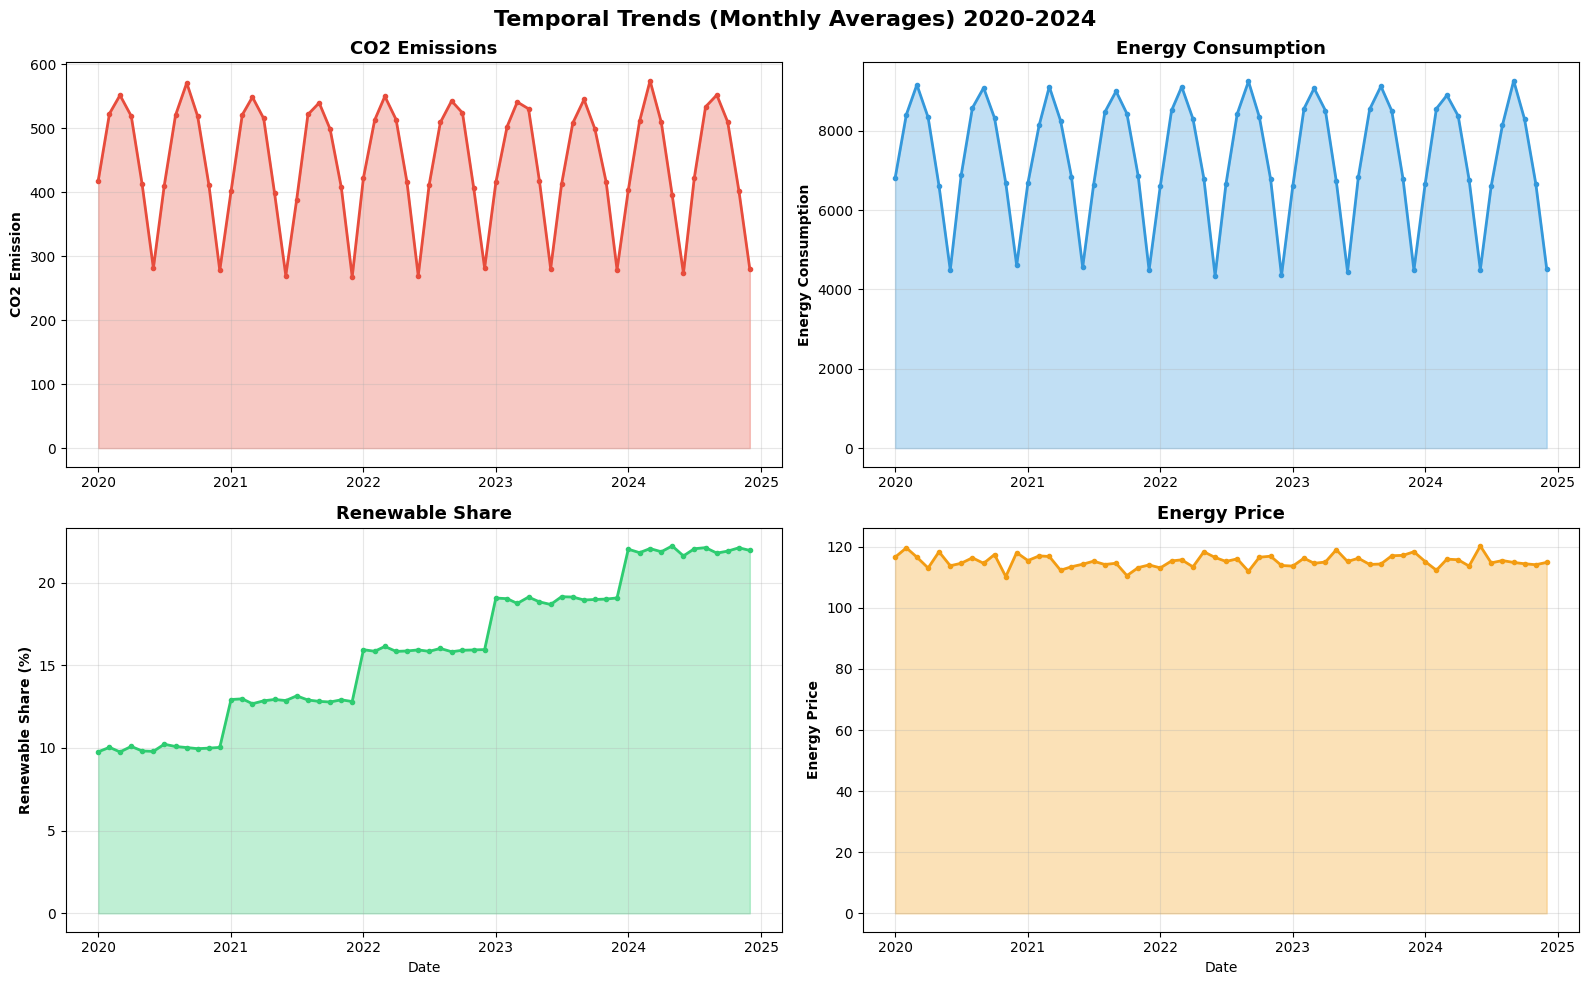

In [282]:
import matplotlib.pyplot as plt

# Aggregate monthly averages
monthly_data = df.groupby(df['date'].dt.to_period('M')).agg({
    'co2_emission': 'mean',
    'energy_consumption': 'mean',
    'renewable_share': 'mean',
    'energy_price': 'mean'
}).reset_index()
monthly_data['date'] = monthly_data['date'].dt.to_timestamp()

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot settings
trends = [
    ('co2_emission', '#e74c3c', 'CO2 Emissions', 'CO2 Emission'),
    ('energy_consumption', '#3498db', 'Energy Consumption', 'Energy Consumption'),
    ('renewable_share', '#2ecc71', 'Renewable Share', 'Renewable Share (%)'),
    ('energy_price', '#f39c12', 'Energy Price', 'Energy Price')
]

for ax, (col, color, title, ylabel) in zip(axes.flatten(), trends):
    ax.plot(monthly_data['date'], monthly_data[col], marker='o', markersize=3, color=color, linewidth=2)
    ax.fill_between(monthly_data['date'], monthly_data[col], color=color, alpha=0.3)
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_ylabel(ylabel, fontweight='bold')
    ax.set_xlabel('Date' if ax in [axes[1,0], axes[1,1]] else '')  # x-label only for bottom plots
    ax.grid(alpha=0.3)

plt.suptitle(
    'Temporal Trends (Monthly Averages) 2020-2024',
    fontsize=16,
    fontweight='bold'
)

plt.tight_layout()
plt.show()


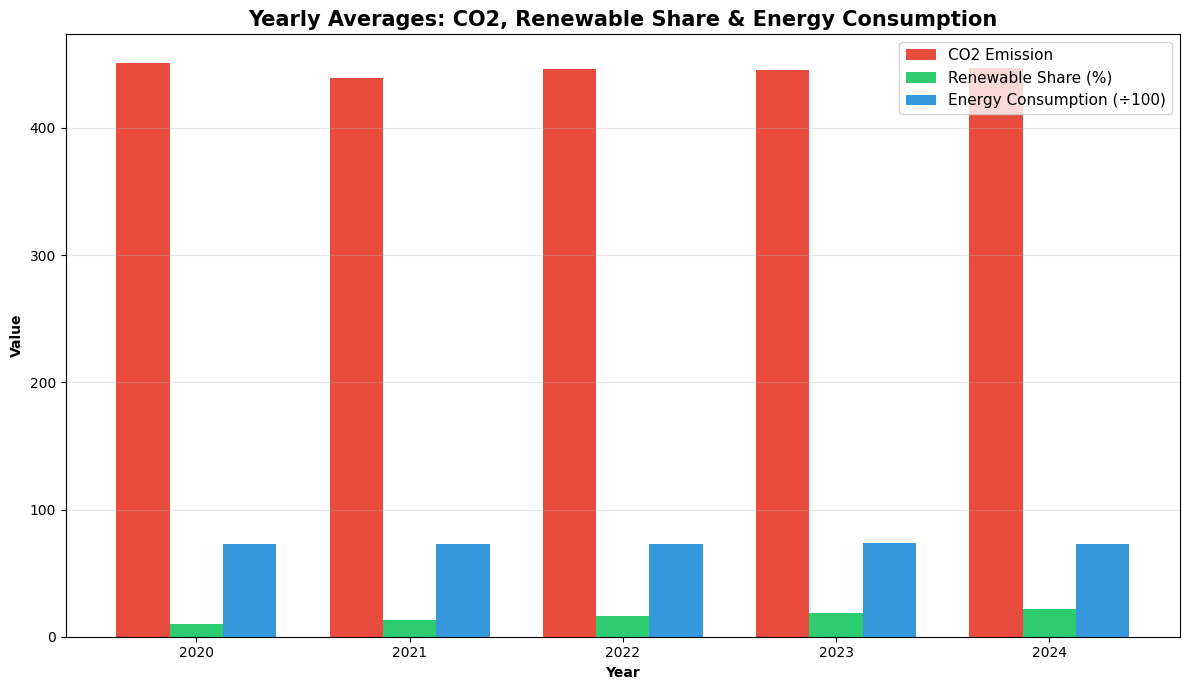

In [283]:
import matplotlib.pyplot as plt
import numpy as np

# Compute yearly averages
yearly_avg = df.groupby('year')[['co2_emission', 'renewable_share', 'energy_consumption']].mean()
yearly_avg['energy_consumption'] /= 100  # Scale for visibility

fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(yearly_avg.index))
width = 0.25

# Plot grouped bars
ax.bar(x - width, yearly_avg['co2_emission'], width, label='CO2 Emission', color='#e74c3c')
ax.bar(x, yearly_avg['renewable_share'], width, label='Renewable Share (%)', color='#2ecc71')
ax.bar(x + width, yearly_avg['energy_consumption'], width, label='Energy Consumption (÷100)', color='#3498db')

# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(yearly_avg.index)
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Value', fontweight='bold')
ax.set_title('Yearly Averages: CO2, Renewable Share & Energy Consumption', fontweight='bold', fontsize=15)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


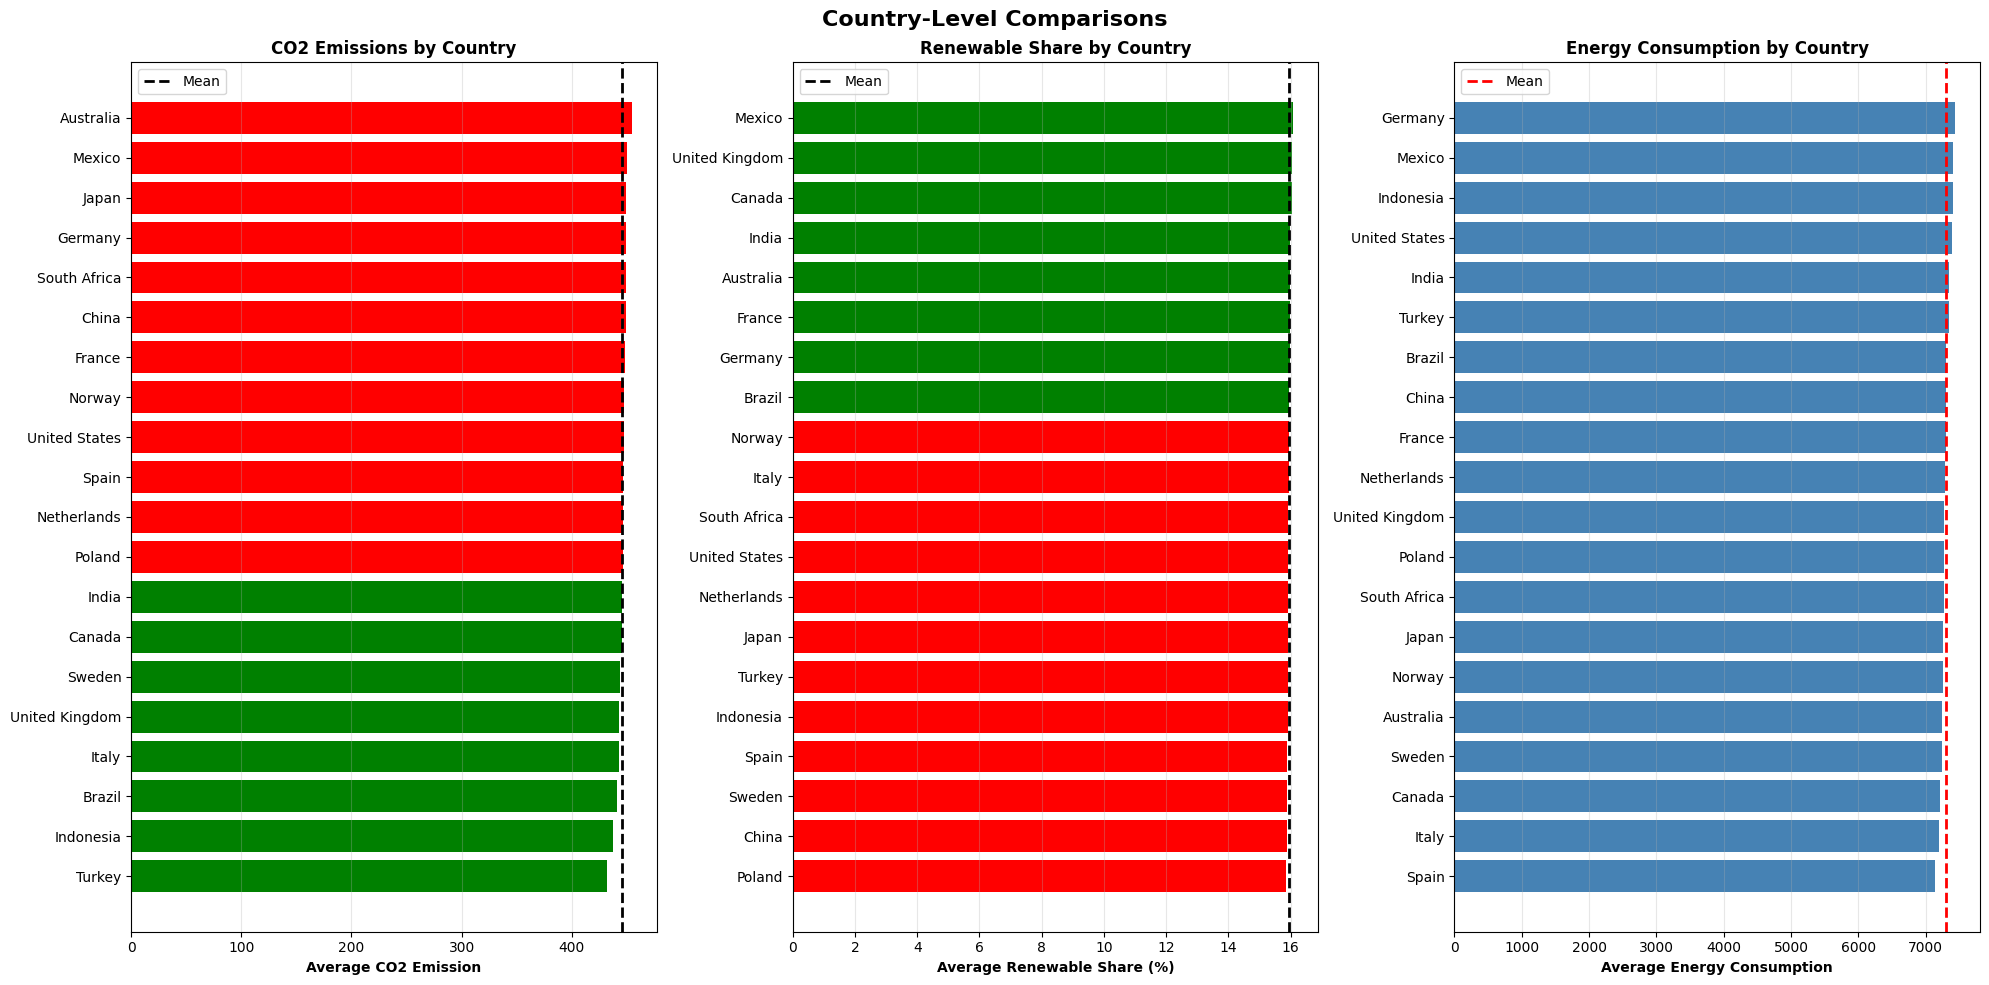

In [284]:
import matplotlib.pyplot as plt
import numpy as np

# Compute country averages
country_avg = df.groupby('country')[['co2_emission', 'renewable_share', 'energy_consumption']].mean()

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# 1. CO2 Emissions by Country
co2_sorted = country_avg.sort_values('co2_emission')
colors = ['red' if x > co2_sorted['co2_emission'].mean() else 'green' for x in co2_sorted['co2_emission']]
axes[0].barh(co2_sorted.index, co2_sorted['co2_emission'], color=colors)
axes[0].axvline(co2_sorted['co2_emission'].mean(), color='black', linestyle='--', linewidth=2, label='Mean')
axes[0].set_xlabel('Average CO2 Emission', fontweight='bold')
axes[0].set_title('CO2 Emissions by Country', fontweight='bold')
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)

# 2. Renewable Share by Country
renewable_sorted = country_avg.sort_values('renewable_share')
colors = ['green' if x > renewable_sorted['renewable_share'].mean() else 'red' for x in renewable_sorted['renewable_share']]
axes[1].barh(renewable_sorted.index, renewable_sorted['renewable_share'], color=colors)
axes[1].axvline(renewable_sorted['renewable_share'].mean(), color='black', linestyle='--', linewidth=2, label='Mean')
axes[1].set_xlabel('Average Renewable Share (%)', fontweight='bold')
axes[1].set_title('Renewable Share by Country', fontweight='bold')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

# 3. Energy Consumption by Country
energy_sorted = country_avg.sort_values('energy_consumption')
axes[2].barh(energy_sorted.index, energy_sorted['energy_consumption'], color='steelblue')
axes[2].axvline(energy_sorted['energy_consumption'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[2].set_xlabel('Average Energy Consumption', fontweight='bold')
axes[2].set_title('Energy Consumption by Country', fontweight='bold')
axes[2].legend()
axes[2].grid(axis='x', alpha=0.3)

plt.suptitle('Country-Level Comparisons', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


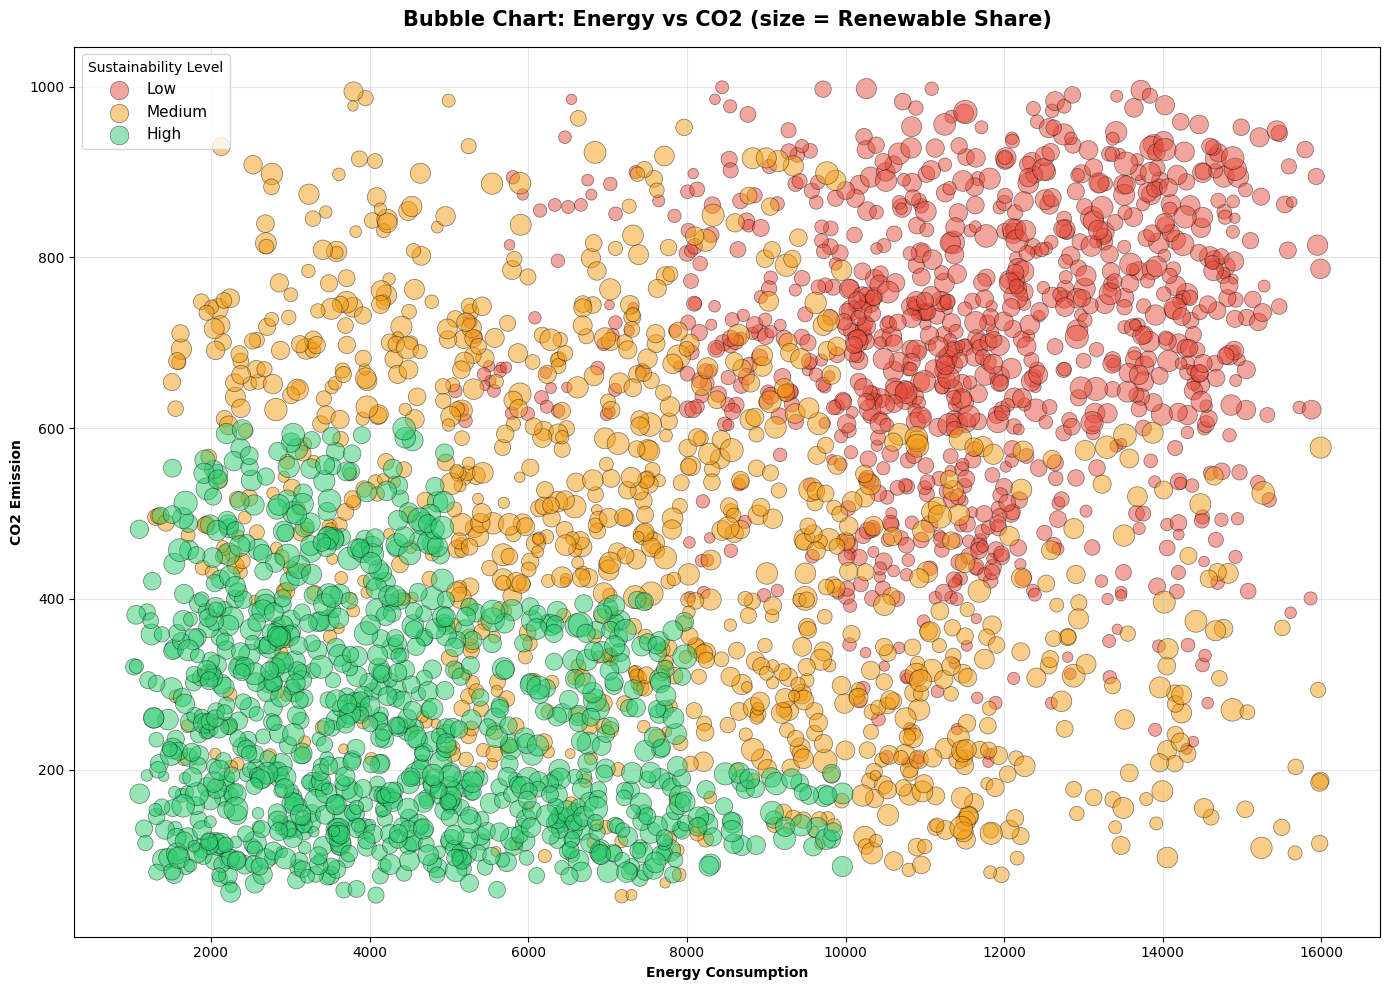

In [285]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

levels = ['Low', 'Medium', 'High']
colors = ['#e74c3c', '#f39c12', '#2ecc71']

for level, color in zip(levels, colors):
    subset = df[df['sustainability_level'] == level]
    sample_size = min(1000, len(subset))  # Limit to 1000 points for readability
    data = subset.sample(n=sample_size, random_state=42)

    plt.scatter(
        data['energy_consumption'],
        data['co2_emission'],
        s=data['renewable_share'] * 10,  # Bubble size proportional to renewable share
        alpha=0.5,
        color=color,
        label=level,
        edgecolors='black',
        linewidth=0.5
    )

plt.xlabel('Energy Consumption', fontweight='bold')
plt.ylabel('CO2 Emission', fontweight='bold')
plt.title(
    'Bubble Chart: Energy vs CO2 (size = Renewable Share)',
    fontsize=15,
    fontweight='bold',
    pad=15
)
plt.legend(title='Sustainability Level', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


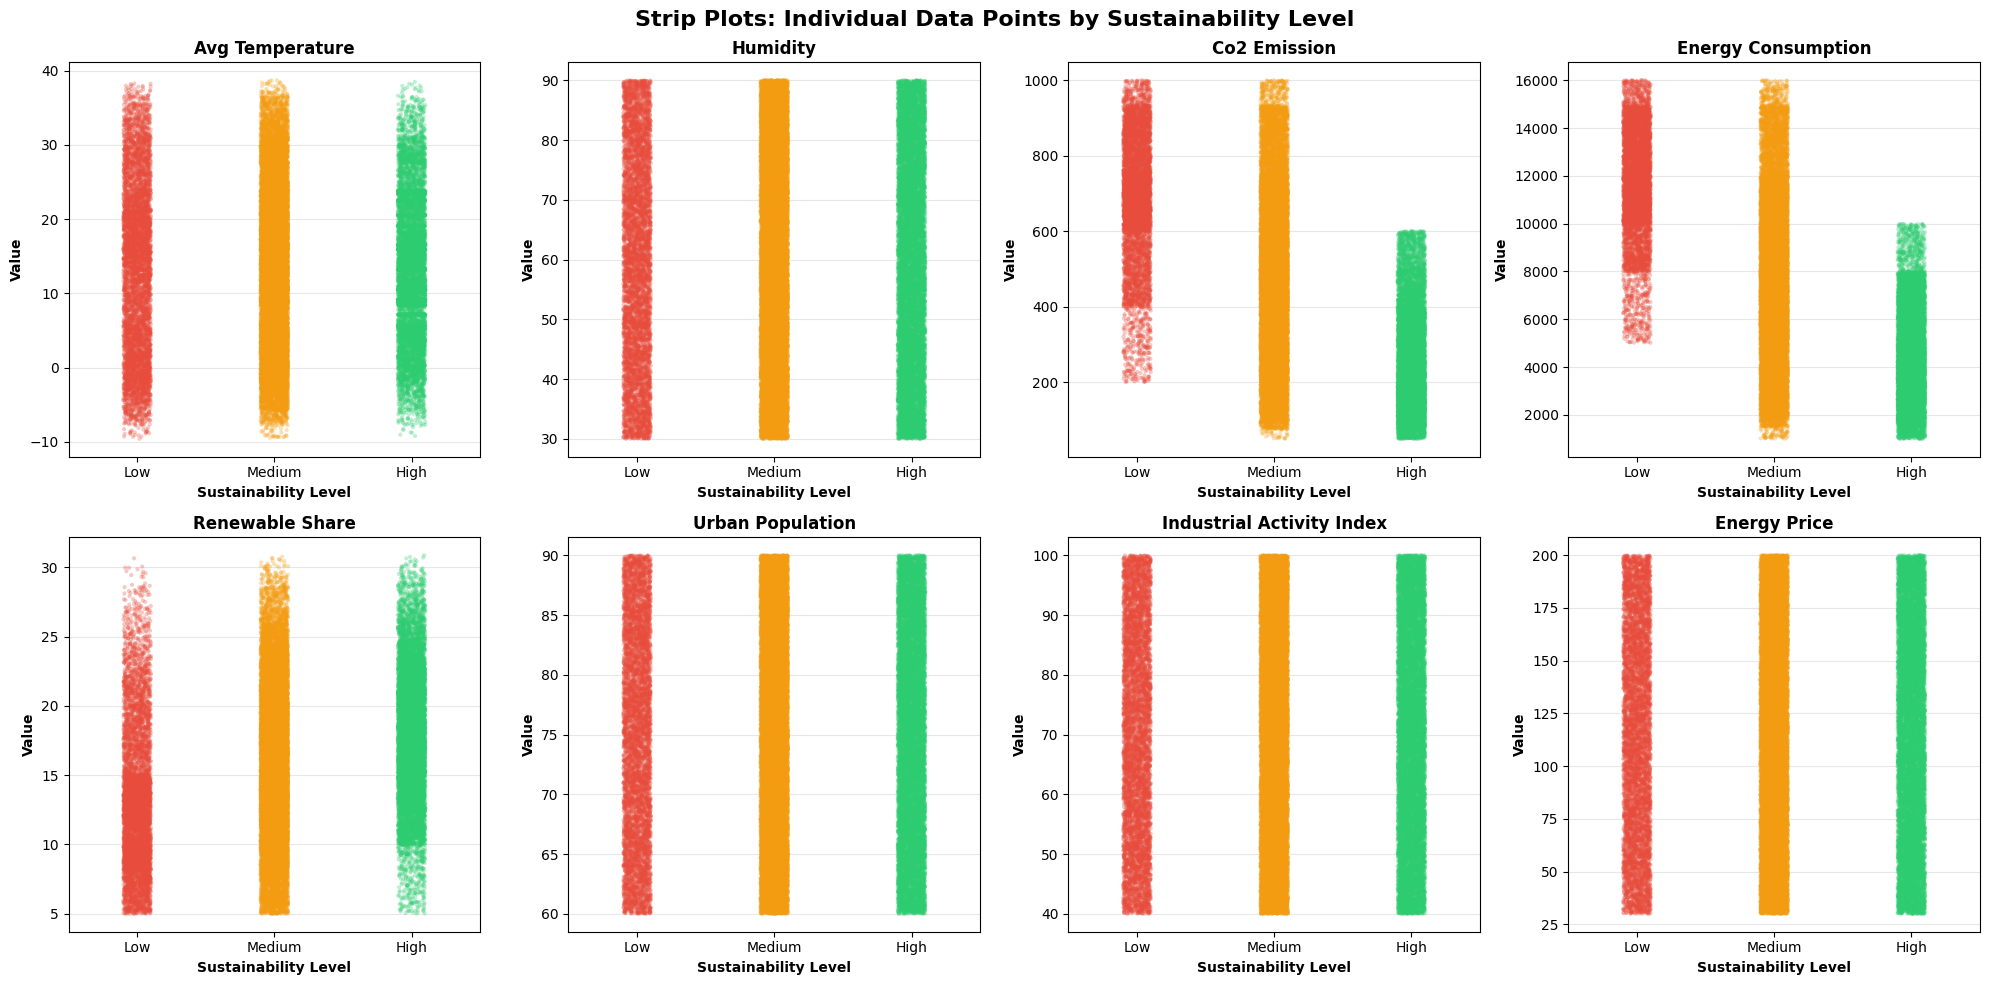

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

palette = {'Low': '#e74c3c', 'Medium': '#f39c12', 'High': '#2ecc71'}

for ax, feature in zip(axes, numerical_features):
    sns.stripplot(
        data=df,
        x='sustainability_level',
        y=feature,
        order=['Low', 'Medium', 'High'],
        palette=palette,
        alpha=0.3,
        size=3,
        ax=ax
    )
    ax.set_xlabel('Sustainability Level', fontweight='bold')
    ax.set_ylabel('Value', fontweight='bold')
    ax.set_title(feature.replace('_', ' ').title(), fontweight='bold', fontsize=12)
    ax.grid(axis='y', alpha=0.3)

plt.suptitle(
    'Strip Plots: Individual Data Points by Sustainability Level',
    fontsize=16,
    fontweight='bold'
)

plt.tight_layout()
plt.show()


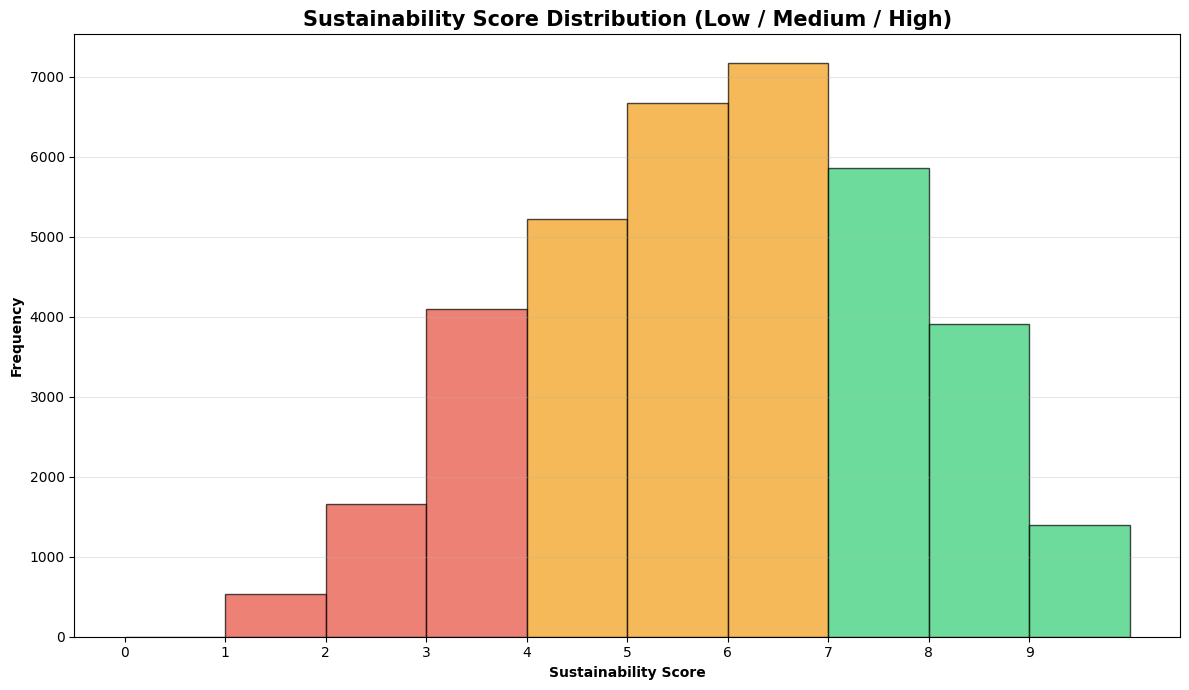

In [287]:
import matplotlib.pyplot as plt

# First, create a numeric 'sustainability_score' if you want a histogram by points
def compute_sustainability_score(row):
    score = 0
    # Renewable share
    if row['renewable_share'] >= 15:
        score += 3
    elif row['renewable_share'] >= 10:
        score += 2
    elif row['renewable_share'] >= 5:
        score += 1
    # CO2 emissions (lower is better)
    if row['co2_emission'] < 200:
        score += 3
    elif row['co2_emission'] < 400:
        score += 2
    elif row['co2_emission'] < 600:
        score += 1
    # Energy consumption (moderate preferred)
    if row['energy_consumption'] < 5000:
        score += 3
    elif row['energy_consumption'] < 8000:
        score += 2
    elif row['energy_consumption'] < 10000:
        score += 1
    return score

df['sustainability_score'] = df.apply(compute_sustainability_score, axis=1)

# Histogram
plt.figure(figsize=(12, 7))
n, bins, patches = plt.hist(df['sustainability_score'], bins=range(0, 11), edgecolor='black', alpha=0.7)

# Color by level
for patch, left in zip(patches, bins):
    if left >= 7:
        patch.set_facecolor('#2ecc71')  # High = Green
    elif left >= 4:
        patch.set_facecolor('#f39c12')  # Medium = Orange
    else:
        patch.set_facecolor('#e74c3c')  # Low = Red

plt.xticks(range(0, 10))
plt.xlabel('Sustainability Score', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Sustainability Score Distribution (Low / Medium / High)', fontweight='bold', fontsize=15)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


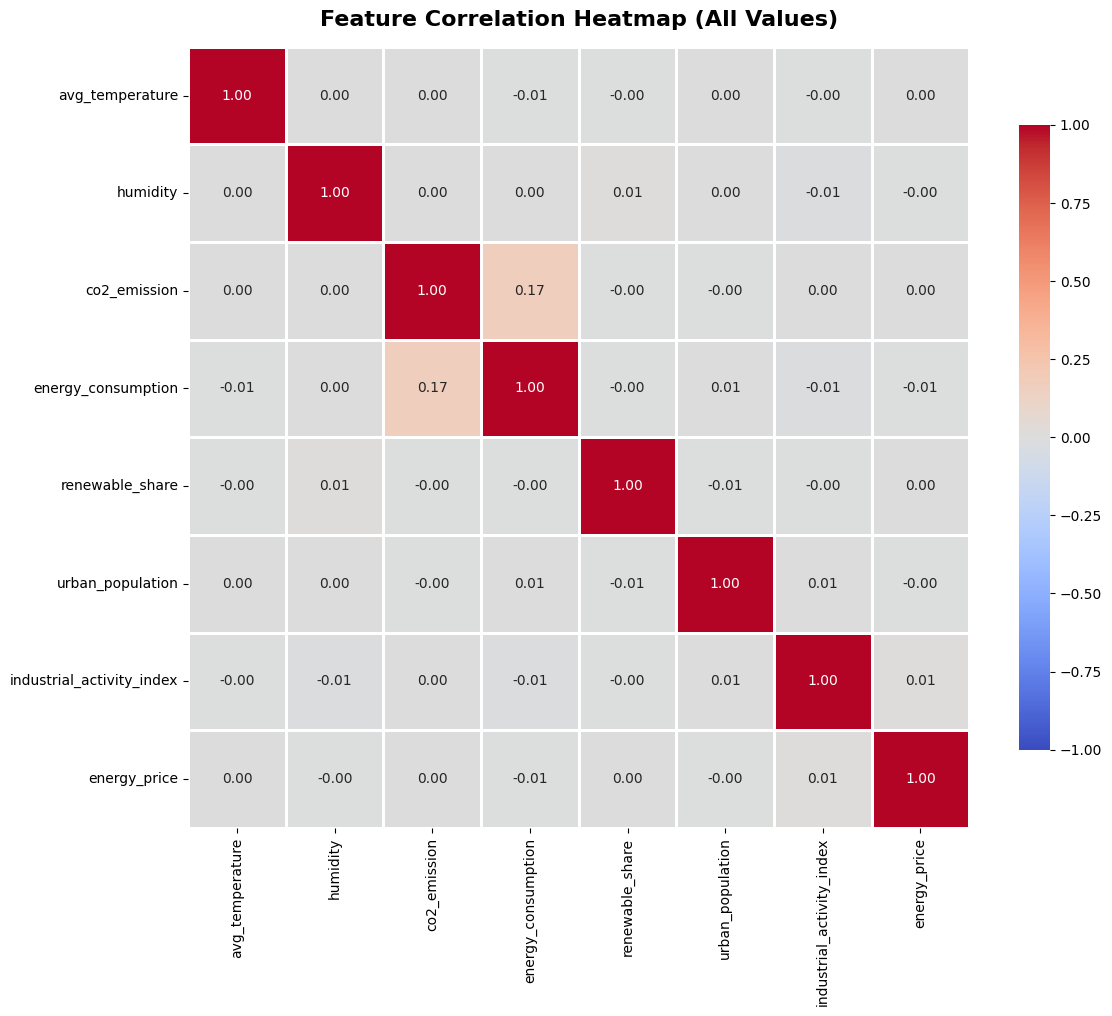

In [288]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))

# Compute correlation matrix for numerical features
corr_matrix = df[numerical_features].corr()

# Full heatmap without masking
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.8,
    cbar_kws={'shrink': 0.8},
    vmin=-1,
    vmax=1
)

plt.title('Feature Correlation Heatmap (All Values)', fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()
